In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [3]:

train = pd.read_csv("train_ctrUa4K.csv", index_col=0)
test = pd.read_csv("test_lAUu6dG.csv", index_col=0)


In [4]:

X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [8]:
print(X.isnull().sum().sum())

149


In [9]:
imp_cat = SimpleImputer(strategy='most_frequent')
imp_med = SimpleImputer(strategy='median')

In [10]:
ct_impute = make_column_transformer((imp_cat,
     make_column_selector(dtype_include=object) ),
       (imp_med,
     make_column_selector(dtype_exclude=object) ),
      verbose_feature_names_out = False)
ct_impute = ct_impute.set_output(transform='pandas')

In [12]:
ohc = OneHotEncoder(sparse_output=False)
ct_enc = make_column_transformer((ohc,
         make_column_selector(dtype_include=object) ),
         ("passthrough",
         make_column_selector(dtype_exclude=object) ),
          verbose_feature_names_out = False)
ct_enc = ct_enc.set_output(transform='pandas')

In [13]:
pipe_pp = Pipeline([('IMP',ct_impute),('ENC',ct_enc)])
X_imp_enc = pipe_pp.fit_transform(X)


Using DECISION TREE

In [16]:
dtc = DecisionTreeClassifier(random_state=24)
params = {'max_depth':[2,5,7,10,13,None],
          'min_samples_split':[2, 5, 7, 10, 13],
          'min_samples_leaf':[1,5,7,10,13]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, 
        random_state=24)
gcv_tree = GridSearchCV(dtc, param_grid=params, cv=kfold, 
           verbose=3, scoring='accuracy')
gcv_tree.fit(X_imp_enc, y)
print(gcv_tree.best_params_)
print(gcv_tree.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.805 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.797 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.780 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.837 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.811 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.805 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.797 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.780 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.837 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, 

In [17]:
best_tree = gcv_tree.best_estimator_

test_imp_inc = pipe_pp.transform(test)
prediction = best_tree.predict(test_imp_inc)


In [18]:
submit = pd.read_csv("sample_submission_49d68Cx.csv")
submit['Loan_Status'] = prediction
submit.to_csv("sbt_tr_prediction.csv", index=False)

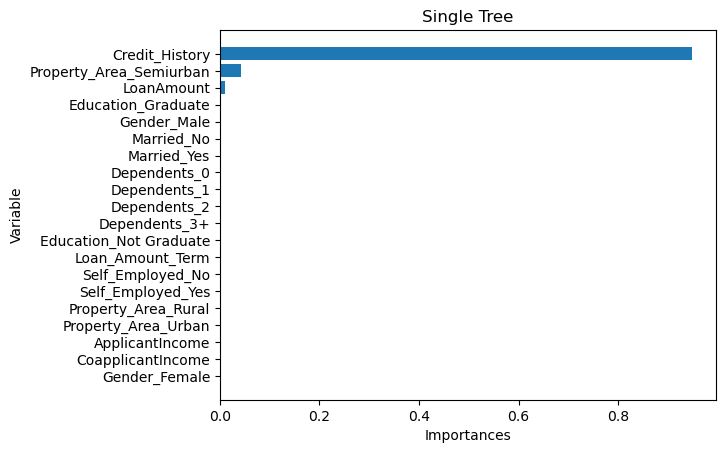

In [19]:

pd_imp = pd.DataFrame({'var':list(X_imp_enc.columns),
                       'imp':best_tree.feature_importances_})
pd_imp.sort_values(by='imp', inplace=True)
plt.barh(pd_imp['var'], pd_imp['imp'])
plt.ylabel("Variable")
plt.title("Single Tree")
plt.xlabel("Importances")
plt.show()

Using SUPPORT VECTOR MACHINE ['LoanAmount', 'Credit_History', 'Property_Area']


In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
import numpy as np 

In [21]:
X = train[['LoanAmount', 'Credit_History', 'Property_Area']]
X_test = test[['LoanAmount', 'Credit_History', 'Property_Area']]


In [22]:
pipe_pp = Pipeline([('IMP',ct_impute),('ENC',ct_enc)])
X_imp_enc = pipe_pp.fit_transform(X)

In [24]:
mm = MinMaxScaler()
std_scaler = StandardScaler()
svm = SVC()
pipe_svm = Pipeline([('SCL', None), ('SVM', svm)])

In [25]:

params = {'SVM__kernel':['rbf', 'linear'],
          'SVM__C': np.linspace(0.01, 4, 10),
          'SVM__gamma': np.linspace(0.01, 4, 10),
          'SCL':[None, std_scaler, mm]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=24)
gcv_svm = GridSearchCV(pipe_svm, param_grid=params,verbose=3,
                       cv=kfold)
gcv_svm.fit(X_imp_enc, y)
print(gcv_svm.best_params_)
print(gcv_svm.best_score_)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV 1/5] END SCL=None, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=0.691 total time=   0.0s
[CV 2/5] END SCL=None, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=0.691 total time=   0.0s
[CV 3/5] END SCL=None, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=0.683 total time=   0.0s
[CV 4/5] END SCL=None, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=0.683 total time=   0.0s
[CV 5/5] END SCL=None, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=0.689 total time=   0.0s
[CV 1/5] END SCL=None, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=0.691 total time=   0.0s
[CV 2/5] END SCL=None, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=0.691 total time=   0.0s
[CV 3/5] END SCL=None, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=0.683 total time=   0.0s
[CV 4/5] END SCL=None, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=0.683 total time=   0.0s
[CV 5/

In [27]:
best_svm = gcv_svm.best_estimator_

test_imp_inc = pipe_pp.transform(X_test)
prediction = best_svm.predict(test_imp_inc)

In [28]:
submit = pd.read_csv("sample_submission_49d68Cx.csv")
submit['Loan_Status'] = prediction
submit.to_csv("sbt_svm_prediction.csv", index=False)

In [29]:
import pickle
with open('loan_prediction_model_decision_tree.pickle', 'wb') as f:
    pickle.dump(gcv_tree, f)


In [30]:
import pickle
with open('loan_prediction_model_svm.pickle', 'wb') as f:
    pickle.dump(gcv_svm, f)
